In [1]:
import pandas as pd

In [2]:
# Importing the CSV files
list_of_orders = pd.read_csv('list-of-orders.csv')
order_details = pd.read_csv('order-details.csv')
sales_target = pd.read_csv('sales-target.csv')

In [3]:
# Merge datasets on "Order ID"
merged_data = pd.merge(list_of_orders, order_details, on='Order ID')

# Merge with sales_target using "Month of Order Date" and "Category"
merged_data = pd.merge(merged_data, sales_target, left_on=['Order Date', 'Category'], right_on=['Month of Order Date', 'Category'], how='left')

# Drop the redundant column "Month of Order Date"
merged_data = merged_data.drop('Month of Order Date', axis=1)

# Display the merged data
print(merged_data.head())

  Order ID  Order Date CustomerName        State       City  Amount  Profit  \
0  B-25601  01-04-2018       Bharat      Gujarat  Ahmedabad  1275.0 -1148.0   
1  B-25601  01-04-2018       Bharat      Gujarat  Ahmedabad    66.0   -12.0   
2  B-25601  01-04-2018       Bharat      Gujarat  Ahmedabad     8.0    -2.0   
3  B-25601  01-04-2018       Bharat      Gujarat  Ahmedabad    80.0   -56.0   
4  B-25602  01-04-2018        Pearl  Maharashtra       Pune   168.0  -111.0   

   Quantity     Category      Sub-Category  Target  
0         7    Furniture         Bookcases     NaN  
1         5     Clothing             Stole     NaN  
2         3     Clothing       Hankerchief     NaN  
3         4  Electronics  Electronic Games     NaN  
4         2  Electronics            Phones     NaN  


In [4]:
# Create a binary target variable indicating whether a purchase was made (1) or not (0)
merged_data['Purchase'] = merged_data['Target'].apply(lambda x: 1 if pd.notna(x) else 0)

# Display the updated merged data
print(merged_data.head())

# Feature Selection: Choose relevant features
features = merged_data[['Amount', 'Profit', 'Quantity']]

# Target variable
target = merged_data['Purchase']

  Order ID  Order Date CustomerName        State       City  Amount  Profit  \
0  B-25601  01-04-2018       Bharat      Gujarat  Ahmedabad  1275.0 -1148.0   
1  B-25601  01-04-2018       Bharat      Gujarat  Ahmedabad    66.0   -12.0   
2  B-25601  01-04-2018       Bharat      Gujarat  Ahmedabad     8.0    -2.0   
3  B-25601  01-04-2018       Bharat      Gujarat  Ahmedabad    80.0   -56.0   
4  B-25602  01-04-2018        Pearl  Maharashtra       Pune   168.0  -111.0   

   Quantity     Category      Sub-Category  Target  Purchase  
0         7    Furniture         Bookcases     NaN         0  
1         5     Clothing             Stole     NaN         0  
2         3     Clothing       Hankerchief     NaN         0  
3         4  Electronics  Electronic Games     NaN         0  
4         2  Electronics            Phones     NaN         0  


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a decision tree classifier
classifier = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print(classification_report(y_test, y_pred))


Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       300

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



Feature Importance:
    Feature  Importance
0    Amount         0.0
1    Profit         0.0
2  Quantity         0.0


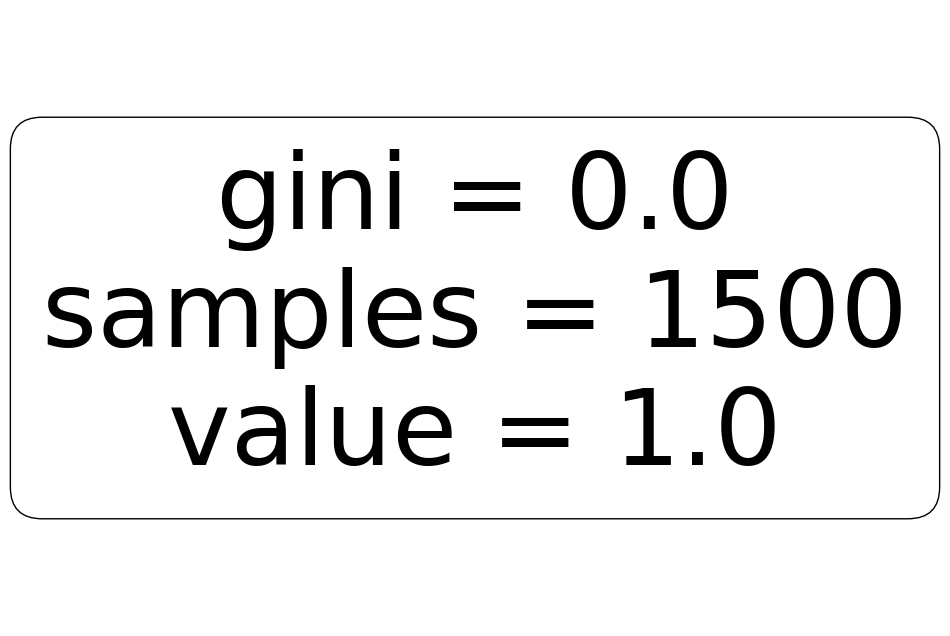

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Fit the decision tree classifier to the entire dataset
classifier.fit(features, target)

# Display feature importance
feature_importance = pd.DataFrame({'Feature': features.columns, 'Importance': classifier.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importance)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(classifier, feature_names=features.columns, class_names=['No Purchase', 'Purchase'], filled=True, rounded=True)
plt.show()


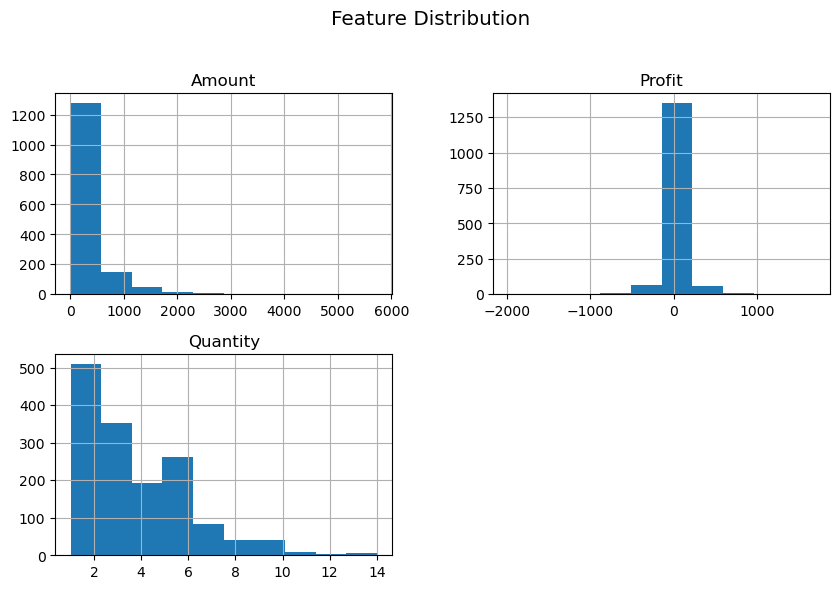

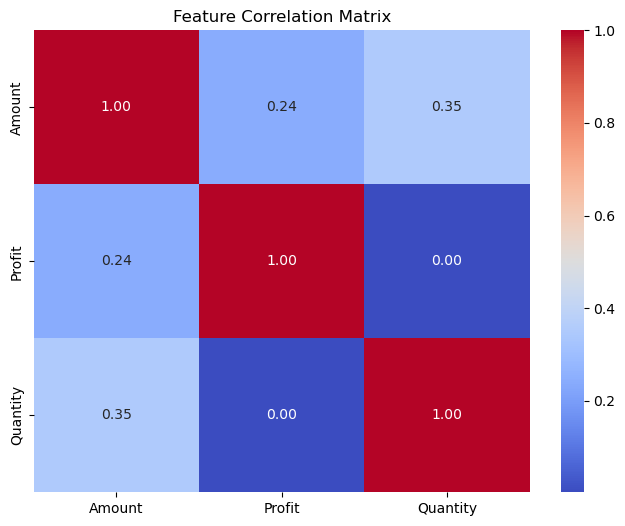

In [7]:
# Display feature distribution
import seaborn as sns
features.hist(figsize=(10, 6))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='x-large')
plt.show()

# Display feature correlations
correlation_matrix = features.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()
